You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


Topic: Correlation between the income of persons in the specific region along with the house prices in that specific region. I thought this will have a corrlation as the average income in a region is the deciding facotr if one wants to buy a home or not- based on his/her budget. I chose this topic as I found a dataset with gooid spread and overall was interested in this topic as I moved to different places and encountered this firsthand in India and the US.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
import graphviz as gv

from scipy.interpolate import PchipInterpolator

In [3]:
#load the data into a pandas dataframe, and print it
url_countries = 'https://raw.githubusercontent.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction/refs/heads/master/USA_Housing.csv'
#I could have put the url string directly into pd.read_csv()
co = pd.read_csv(url_countries)

In [4]:
co

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


<Axes: xlabel='Avg. Area Income', ylabel='Price'>

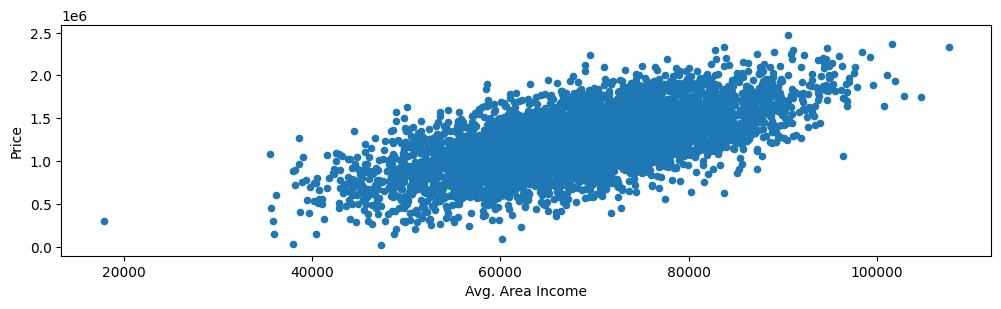

In [5]:
#scatter plot of temperature v. rented count of bikes
co.plot(x="Avg. Area Income", y="Price", figsize=(12, 3), kind="scatter")

In [ ]:
#lb stands for linear bike
with pm.Model() as model_lb:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=0, sigma=100)
    β = pm.Normal("β", mu=0, sigma=10)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * co['Avg. Area Income'])

    #prior for the standard deviation of our likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=co.Price)

    #inference data object
    idata_lb = pm.sample()

Text(0, 0.5, 'house price')

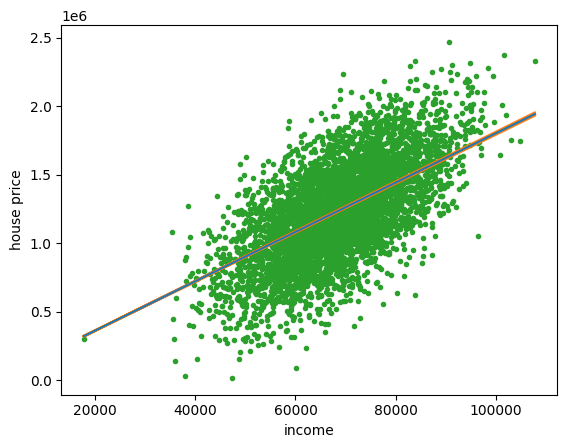

In [7]:
#grabs 100 posterior samples
posterior = az.extract(idata_lb, num_samples=100)

# grabbing x values for graphing.
x_plot = xr.DataArray(
    np.linspace(co['Avg. Area Income'].min(), co['Avg. Area Income'].max(), 50),
    dims="plot_id"
    )

# this creates the expected line, the path we predict temperature and
#rented bike count deviates from
mean_line = posterior["α"].mean() + posterior["β"].mean() * x_plot

#These are a 50 lines that our model came up with
lines = posterior["α"] + posterior["β"] * x_plot

#set up plot
_, ax = plt.subplots()

#plots 50 other lines our model came up with.
ax.plot(x_plot, lines.T, c="C1", alpha=0.2, label="lines")

#plots the mean line
ax.plot(x_plot, mean_line, c="C0", label="mean line")

#plot the raw data
ax.plot(co['Avg. Area Income'],co.Price, "C2.", zorder=-3)

#label axes and create legend
ax.set_xlabel("income")
ax.set_ylabel("house price")

In [ ]:
# posterior predictive check
pm.sample_posterior_predictive(idata_lb, model=model_lb,  extend_inferencedata=True)


Text(0, 0.5, 'price of home')

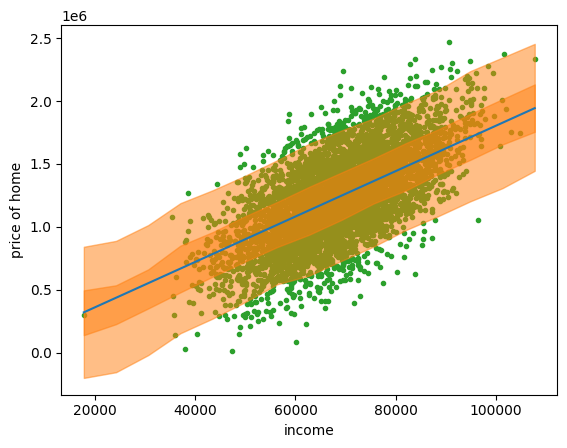

In [10]:
#plots the posterior predictive distribution

#grabs the expected line, or line of best fit formula
mean_line = idata_lb.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
temperatures = np.random.normal(co['Avg. Area Income'].values, 0.01)
idx = np.argsort(temperatures)
x = np.linspace(temperatures.min(), temperatures.max(), 15)

#grabs the 94% HDI and 50% HDI
y_pred_q = idata_lb.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
#sets up the HDIs for graphing
y_hat_bounds = iter(
    [
        PchipInterpolator(temperatures[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(co['Avg. Area Income'], co.Price, "C2.", zorder=-3)
ax.plot(co['Avg. Area Income'][idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("income")
ax.set_ylabel("price of home")

This showcases that there is a good corralation between theincome of persons from specific region vs the prices of houses in that region.

<Axes: xlabel='y_pred'>

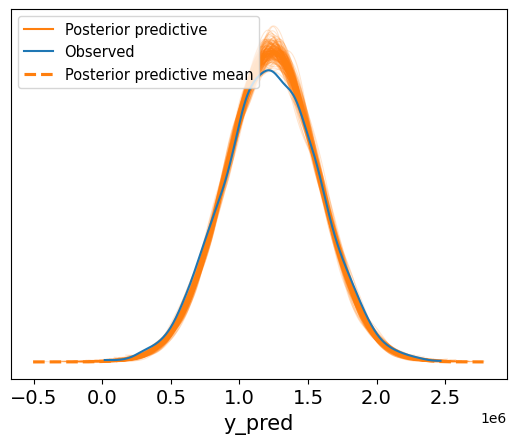

In [11]:

#posterior predictive check
az.plot_ppc(idata_lb, num_pp_samples=200, colors=["C1", "C0", "C1"])

The way the data almost aligns with the posterior predictive mean further showcases the correrlation between the income of a region and the house price of the region- this topic and data set best worked for me as the data wasn't cconcentrated into one tiny region- it was spead out- and the topic of house prices and income of the region greatly corrlates as if the house price is not affordable to people who earn the avg income in a place- then the house price has to reduce to be sold and vice versa.